In [1]:
import numpy as np
import sklearn.cluster as cluster
import pandas as pd
import math
import matplotlib.pyplot as plt
qwe = pd.read_csv("/Users/rahulnair/desktop/Spiral.csv")
import sklearn

In [2]:
# taking only the x and y columns of the data
qwe_1 = qwe[['x','y']]

Text(0, 0.5, 'y')

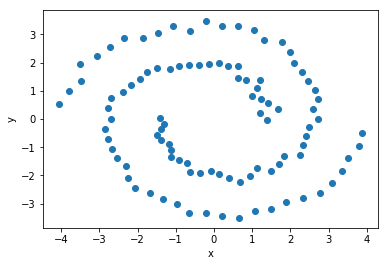

In [3]:
# plotting the data
plt.scatter(qwe_1['x'], qwe_1['y'])
plt.xlabel('x')
plt.ylabel('y')

In [4]:
import numpy
import sklearn.cluster as cluster 
import sklearn.metrics as metrics

In [5]:
kmeans = cluster.KMeans(n_clusters=2, random_state=60616).fit(qwe_1)

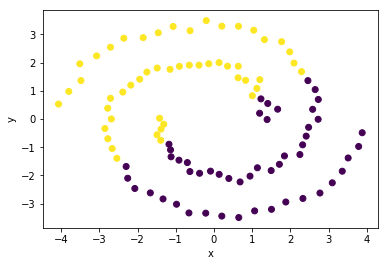

In [6]:
qwe_1['KMeanCluster'] = kmeans.labels_

# plotting the k-mean cluster
plt.scatter(qwe_1['x'], qwe_1['y'], c = qwe_1['KMeanCluster'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
new_data = qwe_1.drop(columns=['KMeanCluster'])
#print(new_data.shape)
nObs = new_data.shape[0]

# Nine nearest neighbors changed after plotting the eigenvalues
kNNSpec = sklearn.neighbors.NearestNeighbors(n_neighbors = 3, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(new_data)
d3, i3 = nbrs.kneighbors(new_data)

# Retrieve the distances among the observations
dist_object = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
distances = dist_object.pairwise(new_data)

# Create the Adjacency and the Degree matrices
Adjacency = np.zeros((nObs, nObs))
Degree = np.zeros((nObs, nObs))

for i in range(nObs):
    for j in i3[i]:
        if (i <= j):
            Adjacency[i,j] = math.exp(- distances[i][j])
            Adjacency[j,i] = Adjacency[i,j]

for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum
        
Lmatrix = Degree - Adjacency

(100,)
evals [-2.23297032e-16  2.92312414e-16  2.72855933e-03  2.74879569e-03
  1.08712726e-02  1.09913486e-02  2.45505584e-02  2.46751770e-02
  4.37464141e-02  4.39493985e-02  6.81612995e-02  6.91901992e-02
  9.82640785e-02  9.99943597e-02  1.32614599e-01  1.35914220e-01
  1.73686624e-01  1.77568262e-01  2.20025921e-01  2.24487077e-01
  2.70567852e-01  2.76366816e-01  3.23216379e-01  3.32714333e-01
  3.85703043e-01  3.94203937e-01  4.48521934e-01  4.59129143e-01
  5.19449150e-01  5.28062612e-01  5.90740780e-01  6.00372924e-01
  6.63556869e-01  6.79548969e-01  7.43623829e-01  7.62320515e-01
  8.23413751e-01  8.43726965e-01  9.05733870e-01  9.30766557e-01
  9.90397480e-01  1.00754239e+00  1.07996419e+00  1.09464729e+00
  1.17355900e+00  1.18803789e+00  1.25930929e+00  1.27555376e+00
  1.34285533e+00  1.35624467e+00  1.38339467e+00  1.42742910e+00
  1.46553881e+00  1.51307571e+00  1.55659978e+00  1.59225111e+00
  1.63232743e+00  1.64479676e+00  1.71176415e+00  1.71791259e+00
  1.79773257

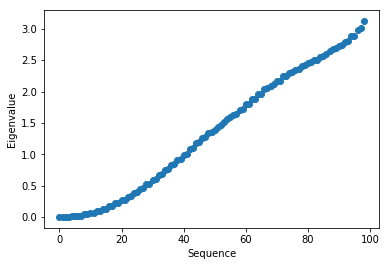

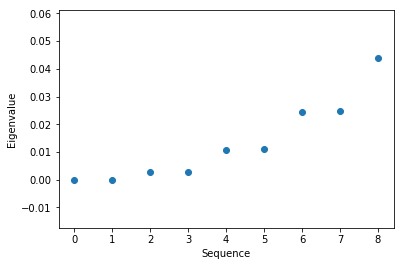

In [8]:
from numpy import linalg as LA
evalues, evectors = LA.eigh(Lmatrix)
print(evalues.shape)

# printing eigenvalues and eigenvectors
print("evals", evalues)
print("evecs", evectors)

# Series plot of the smallest ten eigenvalues to determine the number of clusters
plt.scatter(np.arange(0,99,1), evalues[0:99,])
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.show()

# For zooming in the eigenvalue plotting
plt.scatter(np.arange(0,9,1), evalues[0:9,])
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.show()

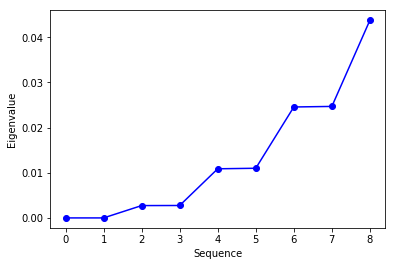

In [9]:
# For analyzing the jump for 
plt.plot(np.arange(0,9,1), evalues[0:9,], 'bo-')
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.show()

[[ 8.26897410e-13  1.41421356e-01]
 [-1.41421356e-01  8.21592794e-13]
 [ 8.26941859e-13  1.41421356e-01]
 [ 8.26851624e-13  1.41421356e-01]
 [-1.41421356e-01  8.19594392e-13]
 [-1.41421356e-01  8.19871948e-13]
 [ 8.26930638e-13  1.41421356e-01]
 [-1.41421356e-01  8.27338198e-13]
 [-1.41421356e-01  8.21009927e-13]
 [ 8.26798076e-13  1.41421356e-01]
 [ 8.26894002e-13  1.41421356e-01]
 [ 8.26849796e-13  1.41421356e-01]
 [ 8.26995456e-13  1.41421356e-01]
 [-1.41421356e-01  8.19760926e-13]
 [-1.41421356e-01  8.20288282e-13]
 [ 8.26927511e-13  1.41421356e-01]
 [ 8.26994321e-13  1.41421356e-01]
 [ 8.26944307e-13  1.41421356e-01]
 [ 8.26849205e-13  1.41421356e-01]
 [-1.41421356e-01  8.28004332e-13]
 [-1.41421356e-01  8.25062241e-13]
 [ 8.26692253e-13  1.41421356e-01]
 [-1.41421356e-01  8.22314439e-13]
 [-1.41421356e-01  8.27060642e-13]
 [-1.41421356e-01  8.24090796e-13]
 [-1.41421356e-01  8.21065438e-13]
 [-1.41421356e-01  8.22675261e-13]
 [ 8.26634788e-13  1.41421356e-01]
 [ 8.26465651e-13  1

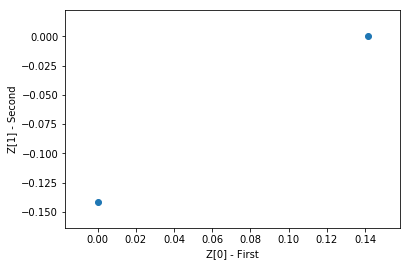

In [10]:
z = evectors[:,[0,1]]
print(z)
plt.scatter(z[[0]], z[[1]])
plt.xlabel('Z[0] - First')
plt.ylabel('Z[1] - Second')
plt.show()

In [11]:
print("{:.10f}".format(z[0].mean()))

0.0707106781


In [12]:
print("{:.10f}".format(z[0].std()))

0.0707106781


In [13]:
print("{:.10f}".format(z[1].mean()))

-0.0707106781


In [14]:
print("{:.10f}".format(z[1].std()))

0.0707106781


In [15]:
kmeans = cluster.KMeans(n_clusters=2, random_state=60616).fit(z)

In [16]:
qwe_1

,x,y,KMeanCluster
0,1.390340,-0.018146,0
1,-1.136269,-1.093869,0
2,1.194276,0.205196,0
3,1.666396,0.348524,0
4,0.135881,-1.963015,0
...,...,...,...
95,-1.852972,2.888408,1
96,-1.122450,-1.340536,0
97,-1.393071,-0.754136,1
98,3.785920,-0.973841,0


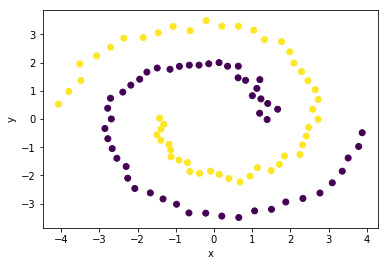

In [17]:
 

# plotting the k-mean cluster
plt.scatter(qwe_1['x'], qwe_1['y'], c = qwe_1['KMeanCluster_1'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()